# Telco Churn Analysis


In [ ]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Dataset info: The dataset contains Telco customer data showing customers that left last month
df = pd.read_csv('https://raw.githubusercontent.com/pik1989/ChurnAnalysisProject-PowerBI/main/Telco-Customer-Churn.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# checking data types of all coloumn
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month


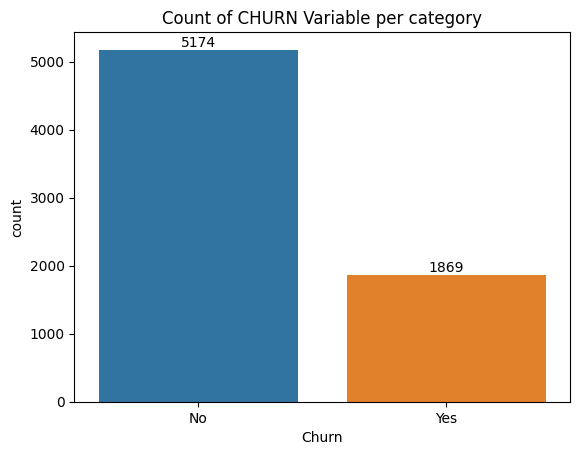

In [ ]:
ax = sns.countplot(x= 'Churn', data =df)  #number count

plt.title("Count of CHURN Variable per category");

for bars in ax.containers:
  ax.bar_label(bars)  #for displaying values

In [ ]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalanced, ratio = 73:27

So we analyse the data with other features while taking the target values separately to get some insights.

---------------------------------------------------------------------------
*Upsampling and downsampling are two common techniques used in signal processing and data analysis. Here's a brief explanation of the difference between them:*

*Upsampling: Upsampling is the process of increasing the sample rate or resolution of a signal or dataset. It involves inserting additional samples between existing samples. The additional samples are typically interpolated values that help increase the detail or frequency content of the data. Upsampling can be useful in various applications such as increasing the resolution of images, improving audio quality, or enhancing the accuracy of time series data.*

*Downsampling: Downsampling is the process of reducing the sample rate or resolution of a signal or dataset. It involves removing or aggregating samples to decrease the amount of data. Downsampling is commonly used to reduce computational complexity, storage requirements, or to simplify the representation of a signal. However, downsampling can also result in a loss of information or aliasing if not done properly. It is important to consider appropriate filtering techniques to avoid artifacts or distortion in the downsampled data.*

#####*In summary, upsampling increases the sample rate or resolution by inserting additional samples, while downsampling reduces the sample rate or resolution by removing or aggregating samples. Each technique serves different purposes and is applied based on the specific requirements of the analysis or application at hand.*
---------------------------------------------------------------------------

In [ ]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


---------------------------------------------------------------------------
The parameter verbose=True is often used in machine learning libraries and functions to enable or increase the amount of output or logging information during the execution of a particular operation.

*When verbose=True, it means that the operation will provide additional information and progress updates, which can be useful for understanding the execution flow and diagnosing any potential issues.*

*The specific behavior of verbose=True can vary depending on the library or function being used. It might include printing status messages, progress bars, or logging information to the console. The verbosity level and the exact information displayed can also differ.*

*In general, setting verbose=True can be helpful when you want to see more detailed information about the execution of a function or algorithm, especially when working on debugging or understanding the inner workings of a process. However, it may produce more output, which could impact the performance or clutter the console depending on the situation.*

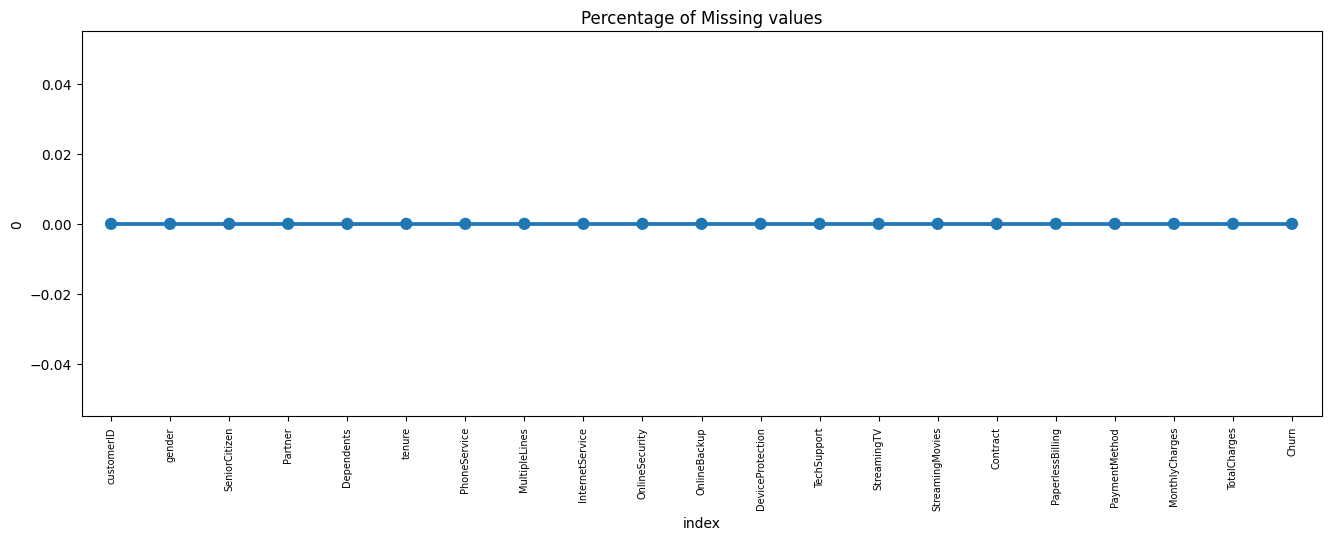

In [ ]:
# Visual representation of Missing Values
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.show()


#Missing Data - Initial Intuition
Here, we don't have any missing data.
General Thumb Rules:

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

#Data Cleaning
1. Create a copy of base data for manupulation & processing

2. Total Charges should be numeric amount. Let's convert it to numerical data type


In [ ]:
df_copy = pd.DataFrame(df)  # copy the DataFrame to df_copy

df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')
missing_values = df_copy.isnull().sum()

print(missing_values)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


---------------------------------------------------------------------------
errors='coerce': This is an optional parameter of to_numeric() that determines how to handle conversion errors. Setting errors='coerce' means that any values that cannot be converted to numeric will be replaced with NaN (missing values).

---------------------------------------------------------------------------

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records



In [ ]:
df_copy.loc[df_copy ['TotalCharges'].isnull() == True] #provides location of the data where it is

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

#Removing missing values



In [ ]:
df_copy.dropna(how = 'any', inplace = True)
#how='any': This parameter specifies the condition for dropping rows.
#Setting how='any' means that a row will be dropped if it contains at least one missing value in any of its columns.
#Alternatively, you can use how='all' to drop a row only if all its values are missing.
df_copy.fillna(0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...



In [ ]:
# Get the max tenure
print(df_copy['tenure'].max()) #72

72



*The code snippet provided generates a new column called 'tenure_group' in the DataFrame df_copy by categorizing the 'tenure' column into groups. Here's an explanation of each component:*

*labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]: This line creates a list of labels for the tenure groups. It uses a list comprehension to generate labels in the format of "{start} - {end}", where start and end represent the range of values for each group. In this case, the range starts from 1 and increases by 12, up to 72.*

*pd.cut(df_copy.tenure, range(1, 80, 12), right=False, labels=labels): This line uses the pd.cut() function from pandas to categorize the 'tenure' column into groups based on the provided range and labels. The df_copy.tenure specifies the column to be categorized. The range(1, 80, 12) provides the bin edges for the groups, starting from 1 and incrementing by 12, up to 80. The right=False parameter means that the intervals are left-closed and right-open. The labels=labels assigns the previously defined labels to the groups.*

*df_copy['tenure_group'].value_counts(): This line counts the occurrences of each unique value in the 'tenure_group' column. It returns a Series object with the counts for each category in the 'tenure_group' column.*

*By executing this code, you will generate a new column 'tenure_group' in the DataFrame df_copy, categorizing the 'tenure' values into groups based on the specified range and labels. The value_counts() function then provides the count of occurrences for each category in the 'tenure_group' column.*

In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_copy['tenure_group'] = pd.cut(df_copy.tenure, range(1, 80, 12), right=False, labels=labels)


In [ ]:
df_copy['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

6. Remove columns not required for processing


In [ ]:
#drop column customerID and tenure
df_copy.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


#Data Exploration
1. Plot distibution of individual predictors by churn

##Univariate Analysis
*Univariate analysis is a statistical method that focuses on analyzing and summarizing the characteristics of a single variable. It aims to understand the distribution, central tendency, variability, and other key attributes of the variable without considering the relationship with other variables. Univariate analysis is useful for gaining insights into individual variables and assessing their patterns and characteristics.*

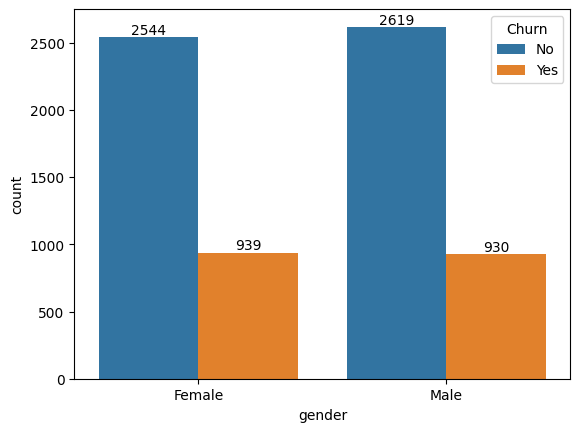

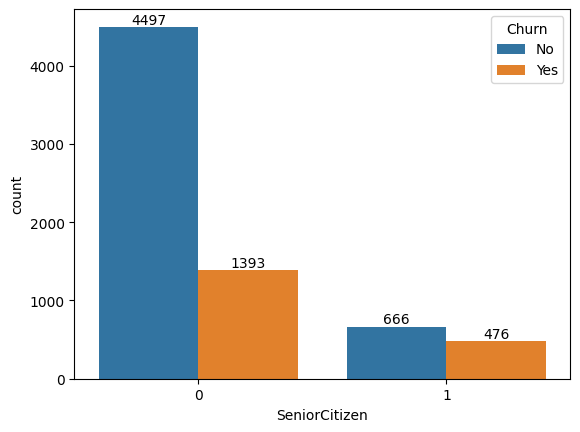

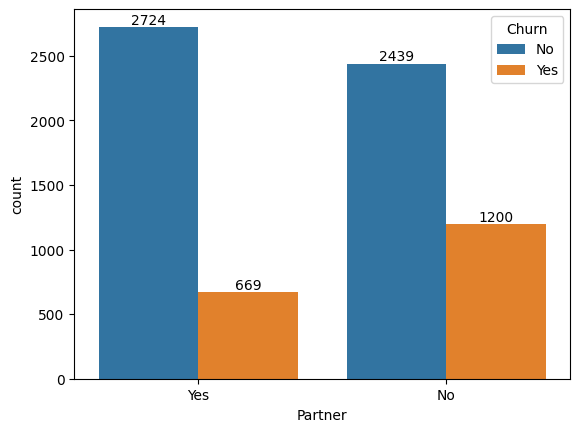

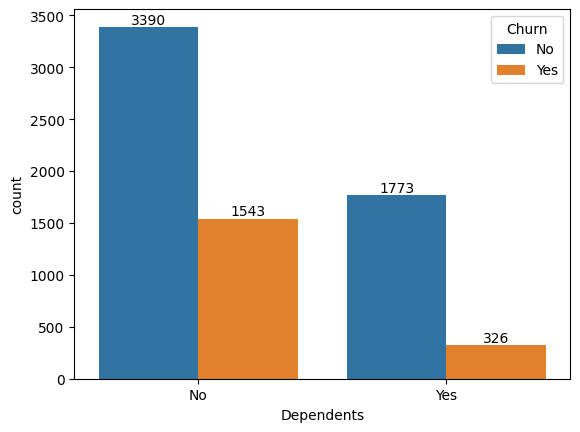

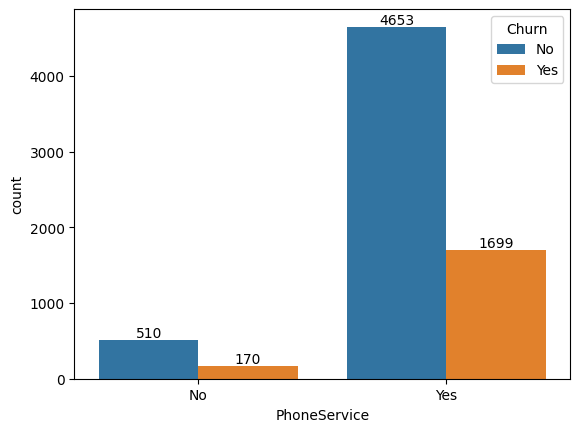

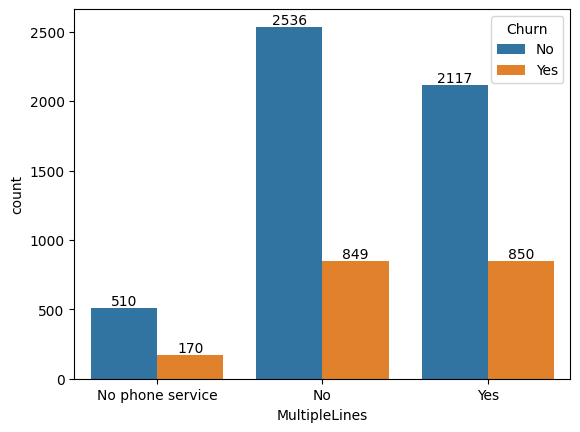

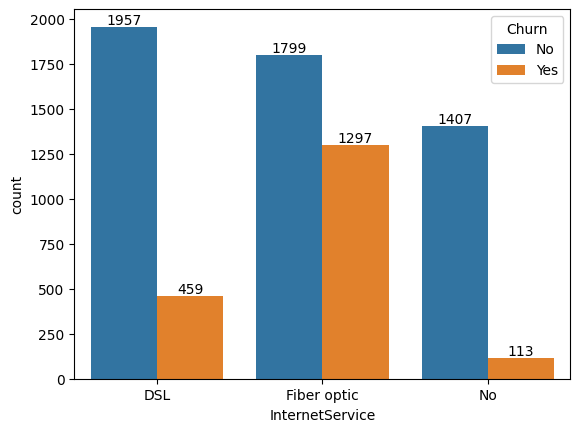

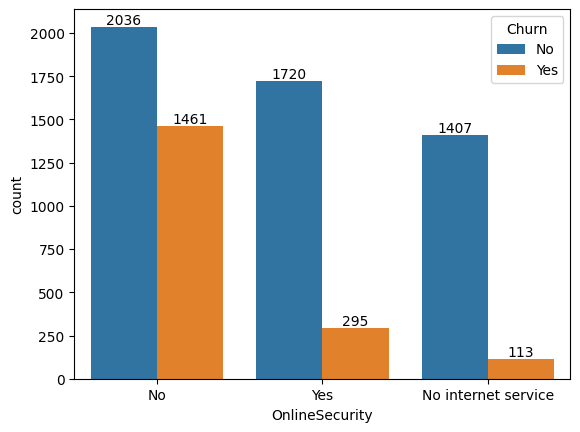

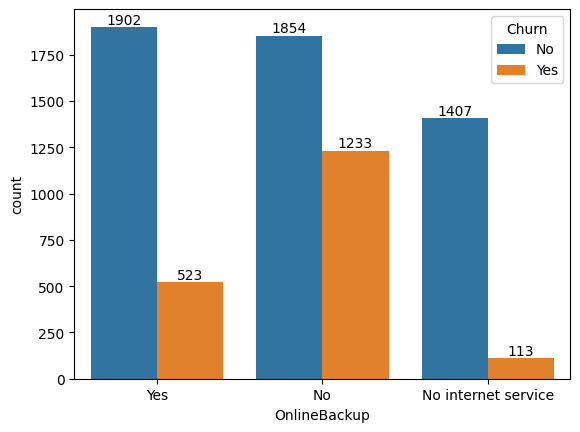

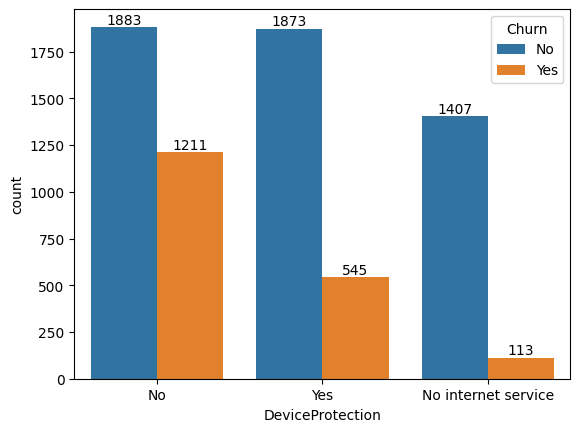

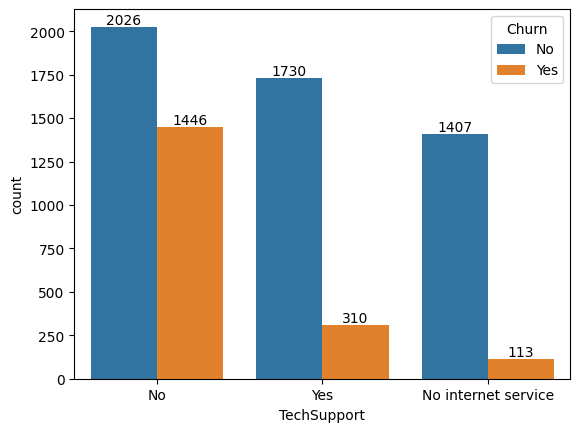

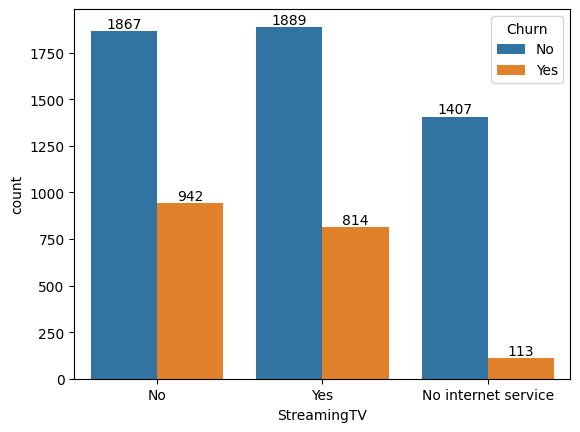

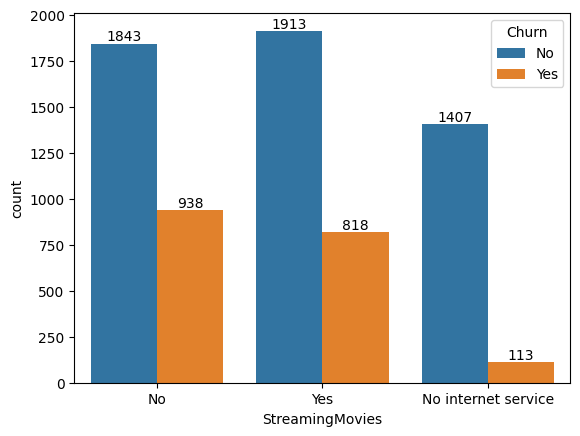

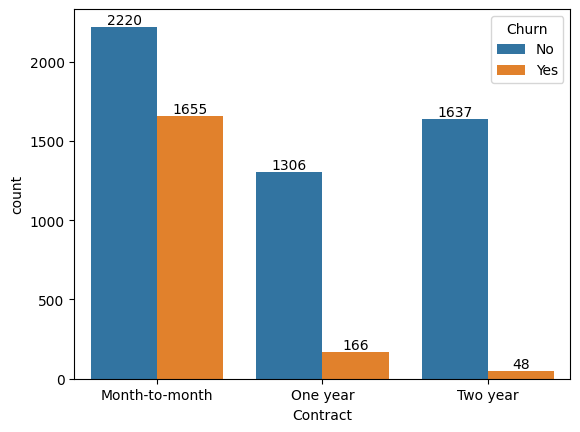

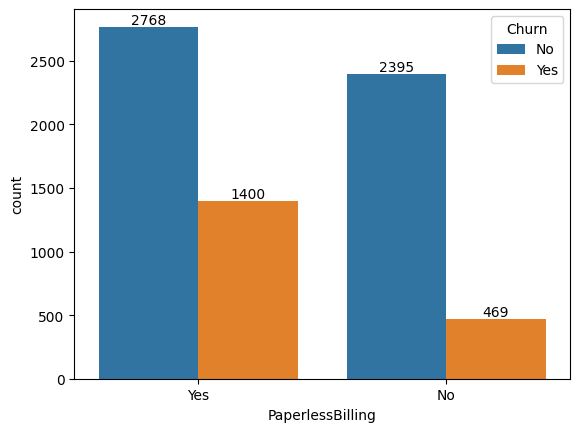

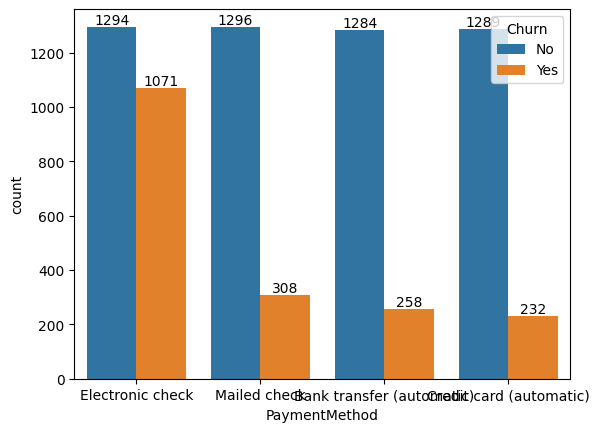

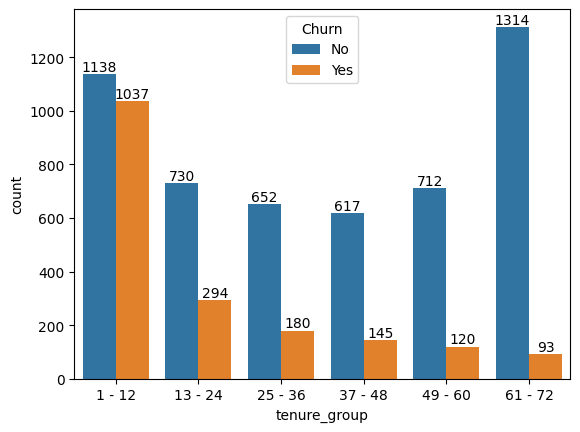

In [ ]:
for i, predictor in enumerate(df_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    ax = sns.countplot(data=df_copy, x=predictor, hue='Churn')
    for bars in ax.containers:
      ax.bar_label(bars)

#The code snippet provided is used to create countplots for each predictor variable in the DataFrame df_copy,
#excluding the columns 'Churn', 'TotalCharges', and 'MonthlyCharges'. Here's an explanation of the code:
#for i, predictor in enumerate(df_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']))::
# This line iterates over each predictor variable in df_copy using a for loop.
#The enumerate() function is used to obtain both the index (i) and the value (predictor) of each predictor variable.
#plt.figure(i): This line creates a new figure for each predictor variable.
# The i variable represents the index of the current predictor variable.

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0



In [ ]:
df_copy['Churn'] = np.where(df_copy.Churn == 'Yes',1,0)
df_copy.head()

#np.where(condition, x, y): This NumPy function takes a condition, condition, and two arrays, x and y.
# It returns an array where each element is taken from x if the corresponding element in condition is True, and from y otherwise.

#In this case, the condition is df_copy.Churn == 'Yes', the x value is 1, and the y value is 0.
#Therefore, np.where(df_copy.Churn == 'Yes', 1, 0) creates a new array with 1 for rows where 'Churn' is 'Yes'
#and 0 for rows where 'Churn' is not 'Yes'.

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


8. Convert all the categorical variables into dummy variables


*pd.get_dummies(df_copy): This function takes the DataFrame df_copy as input and performs one-hot encoding on all categorical variables in the DataFrame. One-hot encoding is a process that converts categorical variables into a binary representation, creating dummy variables for each unique category of a categorical variable.*

*df_copy_dummies = ...: The result of pd.get_dummies() is assigned to a new DataFrame called df_copy_dummies. This new DataFrame contains the original columns from df_copy, along with the newly created dummy variables.*

In [ ]:
df_copy_dummies = pd.get_dummies(df_copy)
df_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


9. Relationship between Monthly Charges and Total Charges



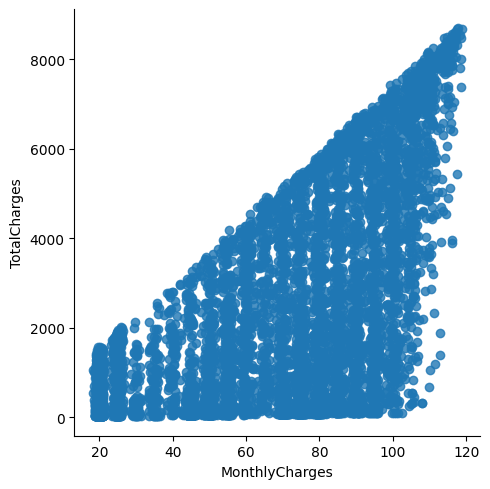

In [ ]:
sns.lmplot(data=df_copy_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
#fit_reg=False: This parameter is set to False to turn off the regression line. By default,
#fit_reg=True would display the regression line, but in this case, it is disabled.

Total charges increases as monthly charges increase

 11. **Churn by Monthly Charges and Total Charges**

---




*The code snippet provided uses seaborn's kdeplot() function to create kernel density plots for the 'MonthlyCharges' variable in the DataFrame df_copy_dummies, separated by the 'Churn' categories. Here's an explanation of the code:*

*Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 0) ], color="Red", shade=True): This line creates a kernel density plot for the 'MonthlyCharges' variable when 'Churn' is 0 (representing no churn). The density plot is displayed in red and shaded. *

*Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 1) ], ax=Mth, color="Blue", shade=True): This line creates another kernel density plot for the 'MonthlyCharges' variable when 'Churn' is 1 (representing churn). The density plot is displayed in blue and shaded. The ax=Mth parameter is used to overlay this plot on the previously created plot (Mth).*

*Mth.legend(["No Churn", "Churn"], loc='upper right'): This line adds a legend to the plot to indicate the colors used for 'No Churn' and 'Churn'.*

*Mth.set_ylabel('Density'): This line sets the label for the y-axis as 'Density'.*

*Mth.set_xlabel('Monthly Charges'): This line sets the label for the x-axis as 'Monthly Charges'*.

*Mth.set_title('Monthly charges by churn'): This line sets the title of the plot as 'Monthly charges by churn'.*

*By executing this code, you will generate a kernel density plot that displays the density of 'MonthlyCharges' for the 'No Churn' and 'Churn' categories. The two density plots are overlaid, and the legend indicates the colors associated with each category. The labels and title provide further context for the plot. *

<ipython-input-33-749a5f05b0f7>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 0) ],
<ipython-input-33-749a5f05b0f7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

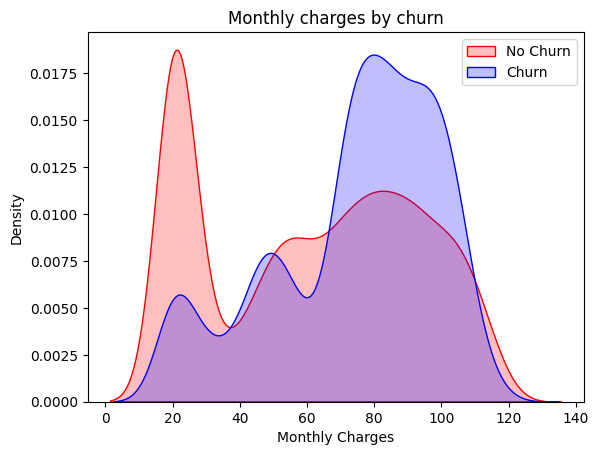

In [ ]:
Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight: Churn is high when Monthly Charges ar high

<ipython-input-34-094027c1614b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies["Churn"] == 0) ],
<ipython-input-34-094027c1614b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

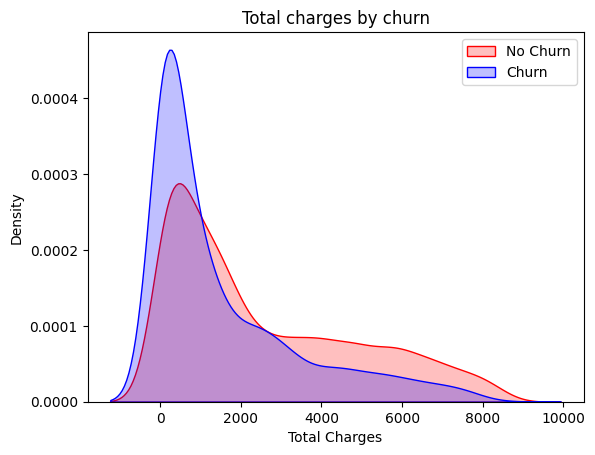

In [ ]:
Tot = sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

11. Build a corelation of all predictors with 'Churn'

<Axes: >

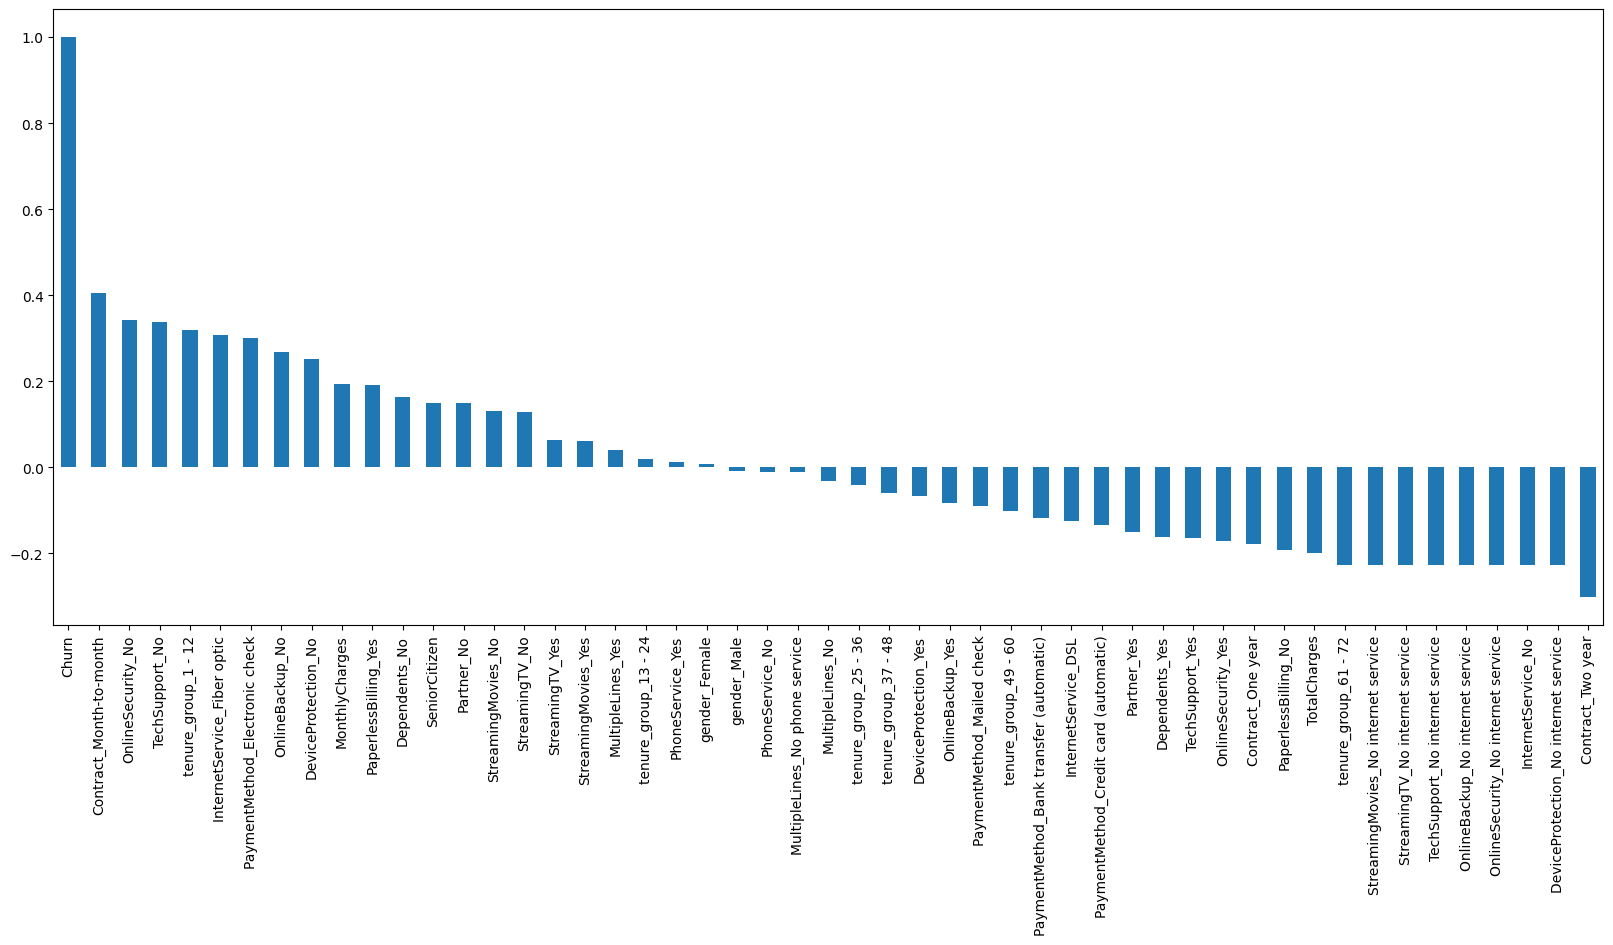

In [ ]:
plt.figure(figsize=(20,8))
df_copy_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#corr(): This is a method provided by pandas DataFrame objects that calculates the correlation coefficients between numeric columns.
#By default, it uses the Pearson correlation coefficient, which measures the linear relationship between two variable

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<Axes: >

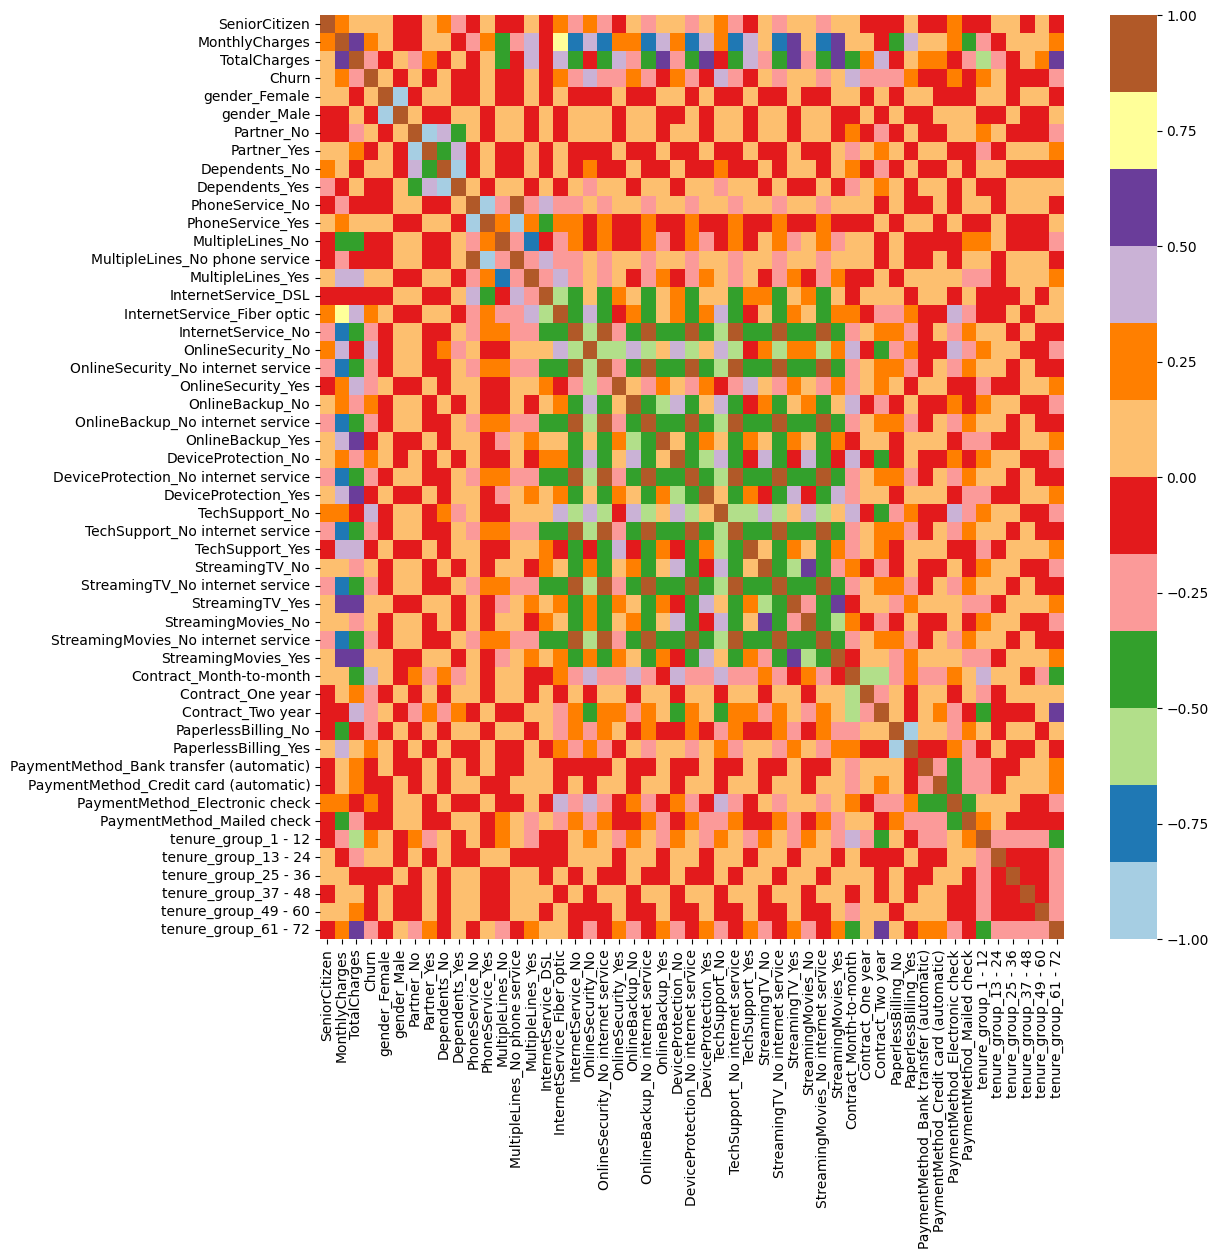

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_copy_dummies.corr(), cmap="Paired")
#cmap="Paired": This parameter sets the color map (colormap) to be used for the heatmap.
# In this case, "Paired" colormap is used, which consists of paired colors suitable for representing positive and negative correlations.

#Bivariate Analysis


In [ ]:
new_df1_target0=df_copy.loc[df_copy["Churn"]==0]
new_df1_target1=df_copy.loc[df_copy["Churn"]==1]


In [ ]:
def uniplot(df1,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 10
    plt.rcParams['axes.titlepad'] = 10


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df1[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df1, x= col, order=df1[col].value_counts().index,hue = hue,palette='bright')

    plt.show()


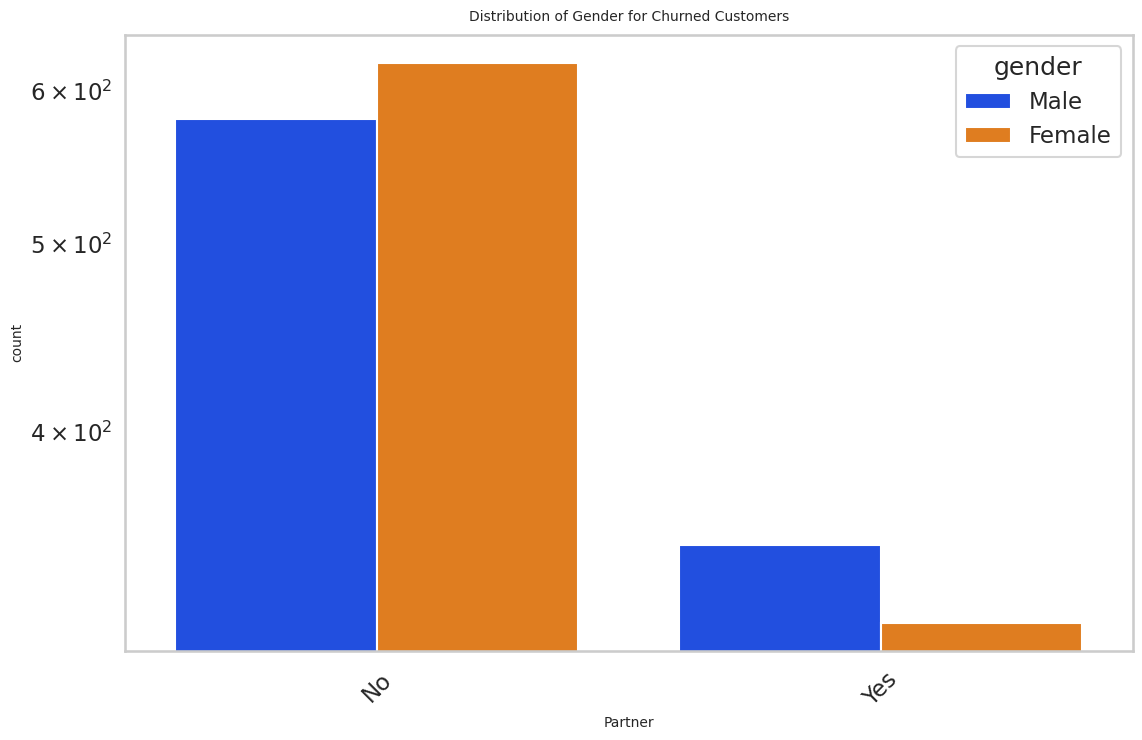

In [ ]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

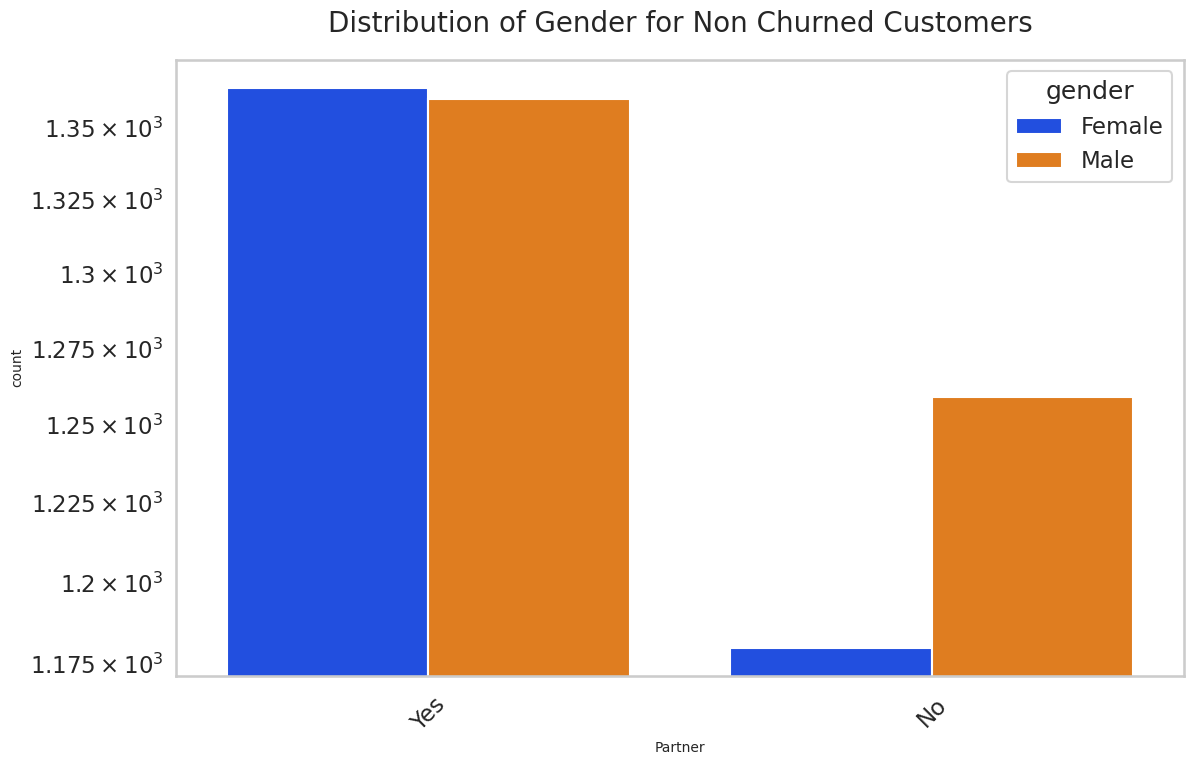

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

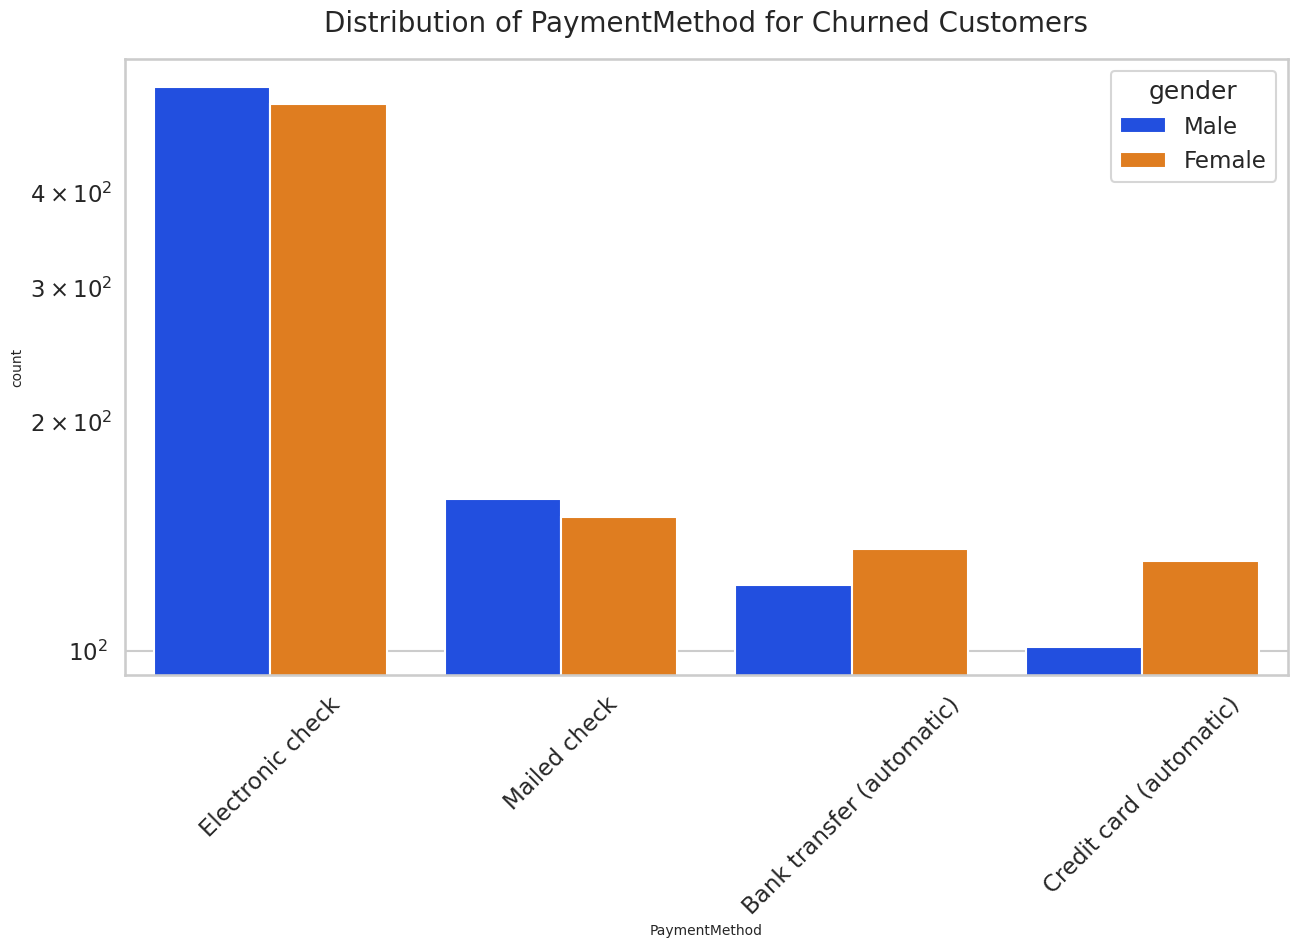

In [ ]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

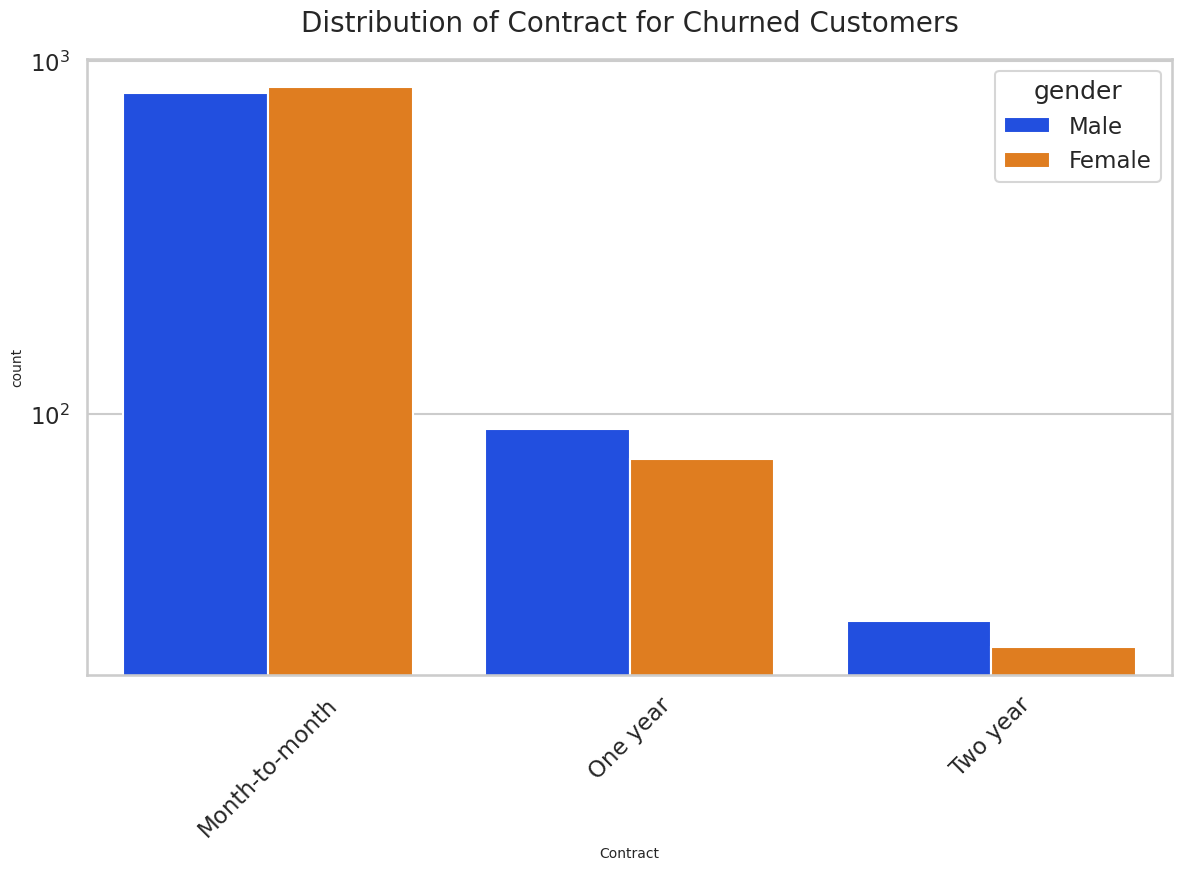

In [ ]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

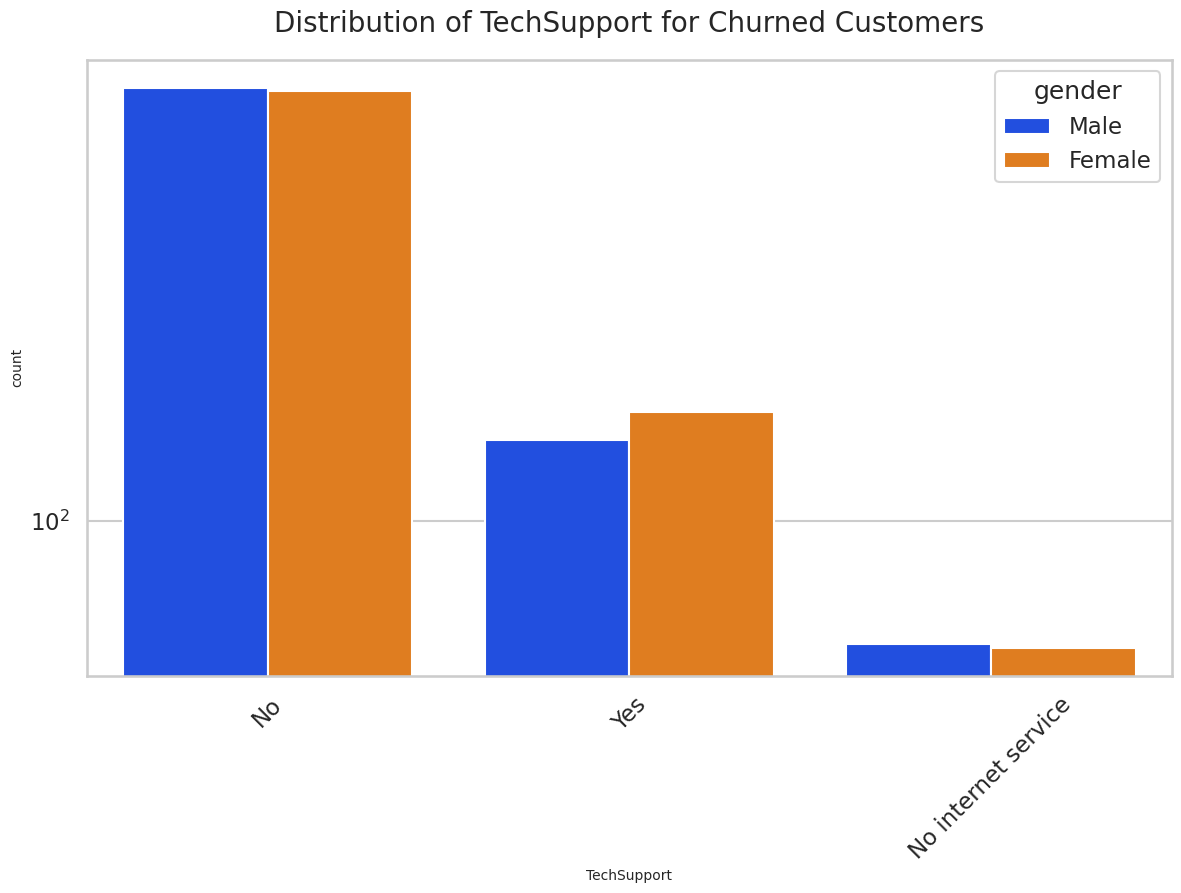

In [ ]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

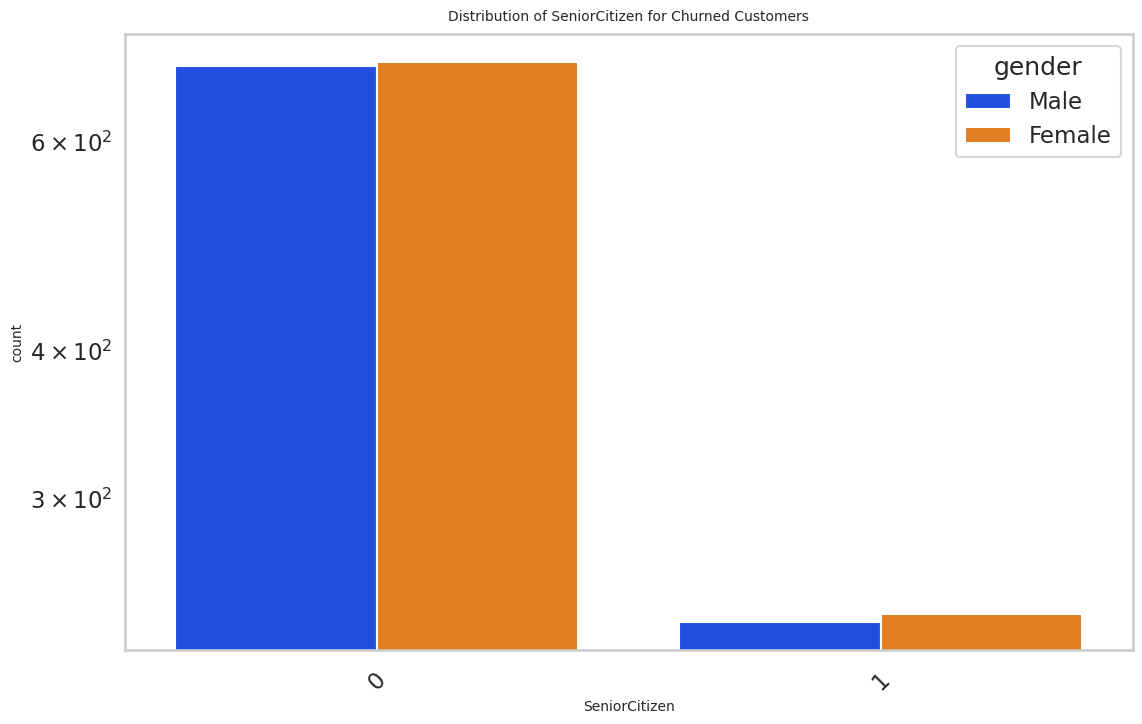

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

#**CONCLUSION**
These are some of the quick insights from this exercise:

Electronic check medium are the highest churners

Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

No Online security, No Tech Support category are high churners

Non senior Citizens are high churners

In [ ]:
df_copy_dummies.to_csv('tel_churn.csv')